In [1]:
# use print only as a function
from __future__ import print_function
import sys
sys.version_info
#pd.show_versions()

sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)

In [2]:
__author__ = 'swe03'

import argparse

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as pplt
from decimal import *

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from statsmodels.graphics.api import qqplot

from scipy import stats

desired_width = 250
pd.set_option('display.width',desired_width)

In [3]:
#!pip install seaborn

In [4]:
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
import statsmodels.tsa as tsa
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
#!pip install pandasql
from pandasql import PandaSQL 
pdsql = PandaSQL()

##### Read the BQ tables created in the Dst Addr and Port profile 1 or Iterate and Create ADS's 1 programs

In [6]:
#!pip install google-api-python-client
p53_ts = pd.read_gbq("select * from prod.ts_port_53_4wks", project_id="network-sec-analytics")
#p53_ts

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 672 rows.

Total time taken 1.0 s.
Finished at 2017-01-03 08:51:28.


In [7]:
p53_ts=p53_ts.sort_values(['date_hour'],ascending=True)
#p53_ts

In [8]:
# Create an Hour only variable for the Seasonal Dummies variable creation
p53_ts['hour'] = p53_ts.date_hour.dt.strftime('%H')  # Get the Hour

In [9]:
# Create a Weekday variable for the Seasonal Dummies variable creation
p53_ts['weekday'] = p53_ts.date_hour.dt.strftime('%w')  # Get Weekday

In [10]:
p53_ts

,date_hour,dst_port,count,max,bytes_mean,min,hour,weekday
228,2016-11-20 00:00:00,53,55,576,143.29,61,00,0
57,2016-11-20 01:00:00,53,51,722,154.22,63,01,0
433,2016-11-20 02:00:00,53,59,408,146.71,66,02,0
310,2016-11-20 03:00:00,53,55,576,135.29,63,03,0
428,2016-11-20 04:00:00,53,59,432,130.32,67,04,0
171,2016-11-20 05:00:00,53,51,576,141.29,63,05,0
342,2016-11-20 06:00:00,53,58,552,145.21,67,06,0
75,2016-11-20 07:00:00,53,55,558,145.96,60,07,0
397,2016-11-20 08:00:00,53,57,516,155.09,65,08,0
201,2016-11-20 09:00:00,53,52,408,135.52,67,09,0


In [11]:
def hour_seasonal_creation(): 
    for index, row in p53_ts.iterrows():
        row_hour = int(row['hour'])
        for i in range(0, 23):
            if row_hour == i:
                p53_ts.loc[index, 'hvar'+ str(i)] = 1
            else:
                p53_ts.loc[index, 'hvar'+ str(i)] = 0
#hour_seasonal_creation()

In [12]:
def weekday_seasonal_creation(): 
    for index, row in p53_ts.iterrows():
        row_weekday = int(row['weekday'])
        for i in range(0, 7):
            if row_weekday == i:
                p53_ts.loc[index, 'wdvar'+ str(i)] = 1
            else:
                p53_ts.loc[index, 'wdvar'+ str(i)] = 0
                
weekday_seasonal_creation()

In [13]:
# This may not be necessary and was only done for the ARMA process
#p53_ts2 = p53_ts.reset_index(drop=True)

In [14]:
#p53_ts

In [15]:
# Need a new Feature created since we repurpose date_hour as Index below
p53_ts['Date_Hour'] = p53_ts['date_hour']
#p53_ts

In [16]:
#Need an Index for the Seasonal Decompostion below
p53_ts.reset_index(inplace=True)
p53_ts = p53_ts.set_index('date_hour')
p53_ts.index.dtype      # Note in the output:dtype('<M8[ns]') but...  np.dtype('datetime64[ns]') = np.dtype('<M8[ns]'):

dtype('<M8[ns]')

##### Execute some Univariate Statistics

In [17]:
p53_ts['bytes_mean'].describe()

count     672.000000
mean      152.840908
std       224.403124
min       105.840000
25%       130.797500
50%       139.000000
75%       147.482500
max      5624.690000
Name: bytes_mean, dtype: float64

In [18]:
#p53_ts['hvar0'].loc[p53_ts['hvar0']== 1].describe()

In [19]:
# Remove the Outliers
p53_ts[p53_ts['bytes_mean'] >1000] = 150
p53_ts['bytes_mean'].describe()

count    672.000000
mean     142.010074
std       28.014244
min      105.840000
25%      130.797500
50%      139.000000
75%      147.482500
max      707.840000
Name: bytes_mean, dtype: float64

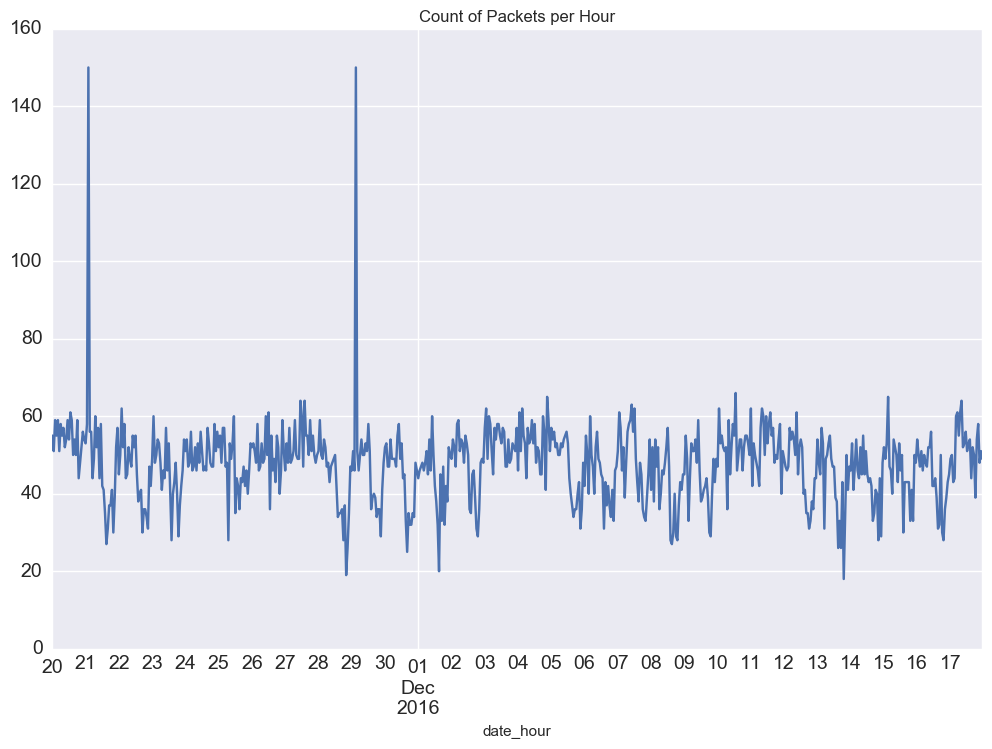

In [20]:
# This plots all of the variables
#p53_ts.plot(figsize=(12,8), title= 'Mean Packet Size in Bytes', fontsize=14)

#p53_ts.bytes_mean.plot(figsize=(12,8), title= 'Mean Packet Size in Bytes', fontsize=14)
p53_ts['count'].plot(figsize=(12,8), title= 'Count of Packets per Hour', fontsize=14)
#plt.savefig('Packet_Count.png', bbox_inches='tight')

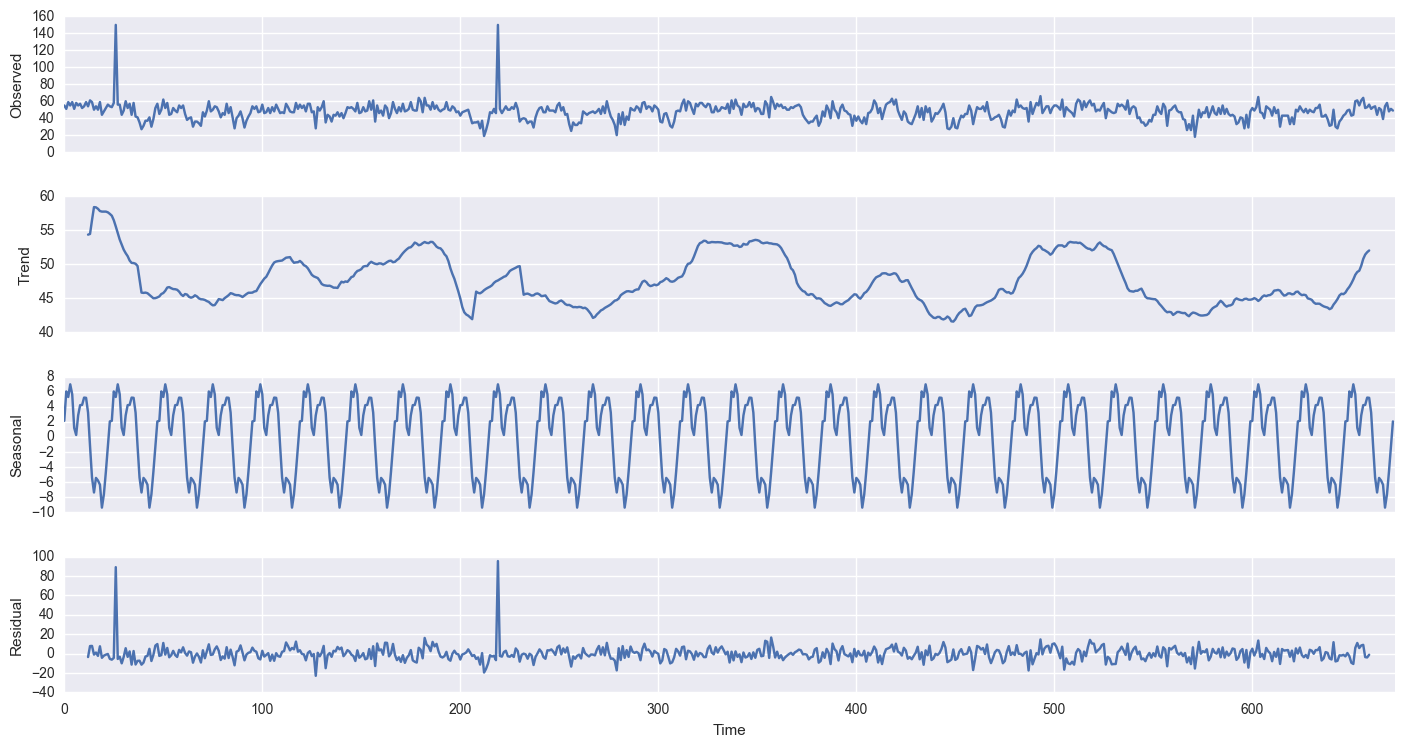

In [21]:
decomposition = seasonal_decompose(p53_ts['count'].values,freq=24)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

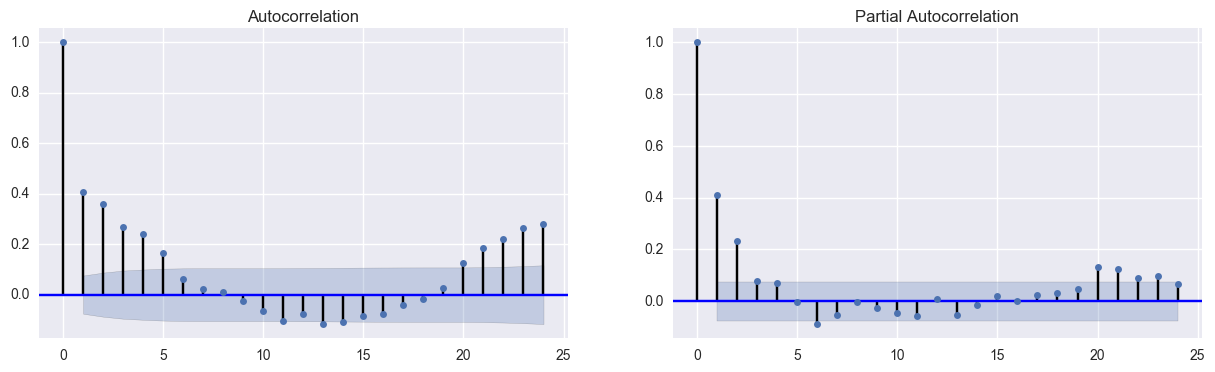

In [22]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(p53_ts['count'], lags=24, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(p53_ts['count'], lags=24, ax=axes[1])

In [23]:
##exog = np.column_stack(list_of_lists)
a = np.array(p53_ts['wdvar0'])
b = np.array(p53_ts['wdvar1'])
c = np.array(p53_ts['wdvar2'])
d = np.array(p53_ts['wdvar3'])
e = np.array(p53_ts['wdvar4'])
f = np.array(p53_ts['wdvar5'])
g = np.array(p53_ts['wdvar6'])
exog1 = np.column_stack((a,b,c,d,e,f,g))
#exog1
exog2 = np.column_stack((a,b,c,d,e,f))

In [33]:
# If time_varying_reg is True then mle_reg must be False (see SARIMAX notes)
# exog=p53_ts['bytes_mean'], time_varying_regression=False, mle_regression=True)
mod = sm.tsa.statespace.SARIMAX(p53_ts['count'], 
     trend='n', order=(12,0,0), seasonal_order=(7,0,0,24))
results = mod.fit()
print(results.summary())

/Users/swe03/anaconda/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                                  Statespace Model Results                                 
Dep. Variable:                               count   No. Observations:                  672
Model:             SARIMAX(12, 0, 0)x(7, 0, 0, 24)   Log Likelihood               -2414.957
Date:                             Tue, 03 Jan 2017   AIC                           4869.914
Time:                                     13:16:48   BIC                           4960.119
Sample:                                 11-20-2016   HQIC                          4904.849
                                      - 12-17-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2256      0.027      8.355      0.000       0.173       0.279
ar.L2          0.1991      

In [155]:
# This will just create the array
#sc_out = results.test_serial_correlation(method=None,lags=24)
#sc_out

array([[[  5.38894036e+00,   3.26595755e+01,   3.34375254e+01,
           3.37346801e+01,   3.40947105e+01,   3.80005971e+01,
           3.84489636e+01,   3.85477149e+01,   3.92620903e+01,
           4.20745823e+01,   4.29280734e+01,   4.45922997e+01,
           4.51443705e+01,   4.53303264e+01,   4.65632029e+01,
           4.87024995e+01,   4.91540772e+01,   4.94758814e+01,
           5.27189889e+01,   5.27190939e+01,   5.50092845e+01,
           5.66592887e+01,   6.77677040e+01,   6.80705071e+01],
        [  2.02647732e-02,   8.09213826e-08,   2.60399937e-07,
           8.44631349e-07,   2.27983342e-06,   1.12305880e-06,
           2.48913823e-06,   5.96196944e-06,   1.03320489e-05,
           7.27296984e-06,   1.11784967e-05,   1.21008529e-05,
           1.97981452e-05,   3.60512240e-05,   4.32442247e-05,
           3.68194973e-05,   5.70997465e-05,   9.05570566e-05,
           5.16036019e-05,   8.93719355e-05,   7.04726331e-05,
           6.87451627e-05,   2.67599188e-06,   4.26870

In [27]:
# Already getting this in the model output above
print(results.aic, results.bic, results.hqic)

4886.76393681 4927.35626188 4902.48476132


In [34]:
sm.stats.durbin_watson(results.resid.values)

1.9525071018141469

In [35]:
 resid1 = results.resid

In [36]:
stats.normaltest(resid1)

NormaltestResult(statistic=647.41761260425039, pvalue=2.6004689913138797e-141)

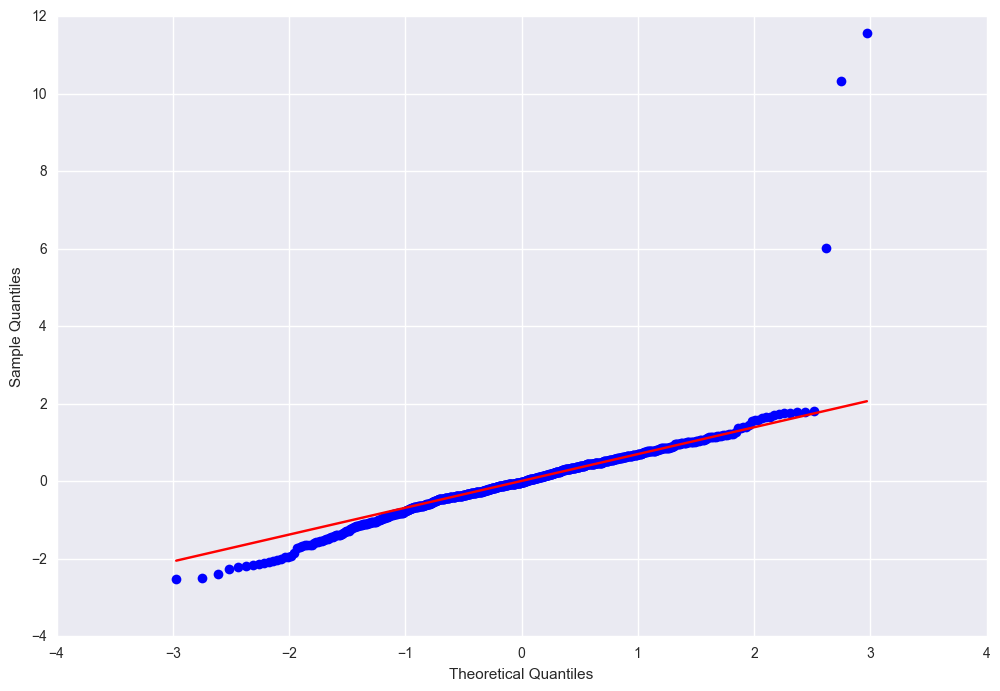

In [37]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid1, line='q', ax=ax, fit=True)

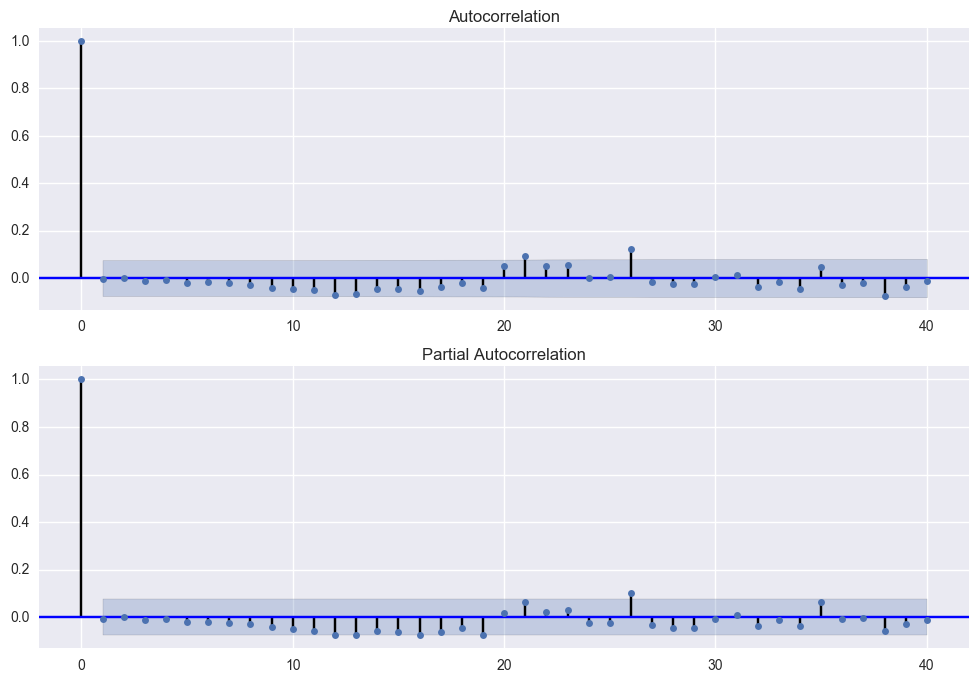

In [38]:
# Graph the acf and pacf for the Residuals
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid1, lags=40, ax=ax2)

In [39]:
# Box-Pierce Q statistic tests the Null Ho that *ALL* correlations up to Lag K are equal to Zero.  This is not the 
# same as the correlogram above.
r,q,p = sm.tsa.acf(resid1.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.005802   0.022720  0.880186
2.0  -0.000077   0.022724  0.988702
3.0  -0.010610   0.098934  0.991965
4.0  -0.008407   0.146857  0.997433
5.0  -0.018815   0.387248  0.995674
6.0  -0.017863   0.604246  0.996329
7.0  -0.021765   0.926880  0.995923
8.0  -0.027647   1.448247  0.993534
9.0  -0.039878   2.534638  0.979937
10.0 -0.044425   3.884916  0.952389
11.0 -0.052343   5.762264  0.888746
12.0 -0.070440   9.167305  0.688578
13.0 -0.065800  12.143006  0.515954
14.0 -0.047559  13.699902  0.472300
15.0 -0.045920  15.153592  0.440411
16.0 -0.055040  17.245207  0.369904
17.0 -0.036364  18.159579  0.378841
18.0 -0.019230  18.415692  0.428600
19.0 -0.040699  19.564604  0.421192
20.0  0.052372  21.469974  0.369949
21.0  0.093069  27.496347  0.155022
22.0  0.051340  29.332983  0.135597
23.0  0.056394  31.552491  0.109814
24.0  0.001159  31.553431  0.138458
25.0  0.003343  31.561255  0.171102
26.0  0.120934  41.815179  0

In [40]:
# NOTE:  No params, as the model doc specifies, are given
predict_sarimax = results.predict(start=672, end=673)
print(predict_sarimax)

2016-12-18 00:00:00    56.194351
2016-12-18 01:00:00    52.029852
Freq: H, dtype: float64


/Users/swe03/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736315.958333, right=736315.958333
  'left=%s, right=%s') % (left, right))


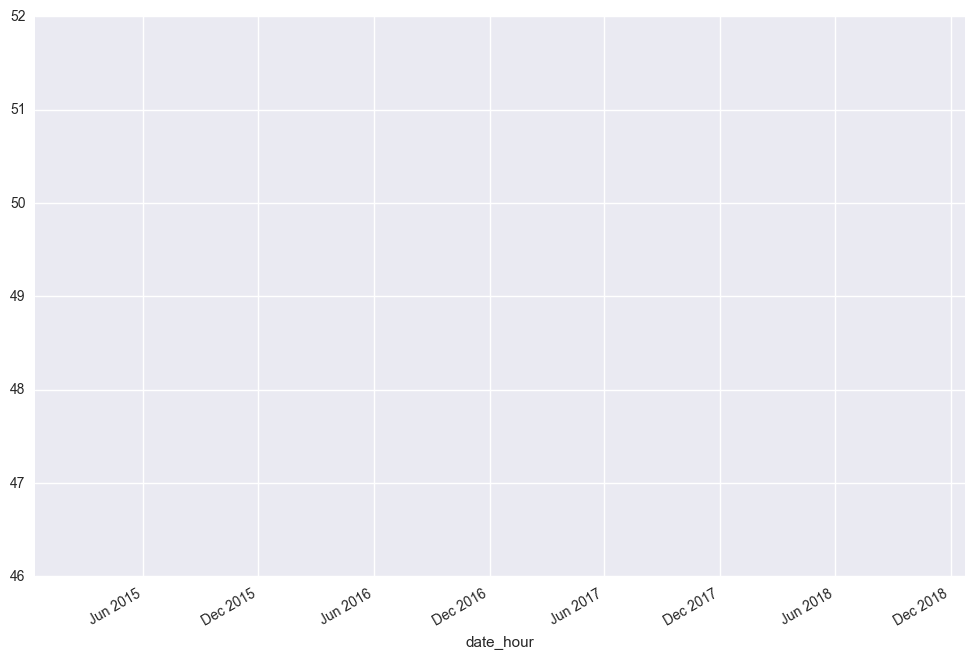

In [41]:
# This is not working 
#fig, ax = plt.subplots(figsize=(12, 8))
#ax = p53_ts['count'].ix['2016-12-17 23:00:00':].plot(ax=ax)
#fig = results.p (start='2016-12-18 00:00:00', end='2016-12-18 01:00:00', dynamic=True, ax=ax, plot_insample=True)

In [41]:
# In-sample one-step-ahead predictions
predict = results.get_prediction(start=672, end=673)
predict_ci = predict.conf_int()

In [42]:
predict.predicted_mean

2016-12-18 00:00:00    56.194351
2016-12-18 01:00:00    52.029852
Freq: H, dtype: float64

In [43]:
predict_ci.sort_index(ascending=True)

,lower count,upper count
2016-12-18 00:00:00,39.149793,73.238909
2016-12-18 01:00:00,34.556756,69.502947


In [126]:
p53_ts.ix[0]

date_hour     2016-12-02 05:00:00
dst_port                       53
count                          59
max                           642
bytes_mean                 137.95
min                            64
hour                           05
weekday                         5
wdvar0                          0
wdvar1                          0
wdvar2                          0
wdvar3                          0
wdvar4                          0
wdvar5                          1
wdvar6                          0
forecast                      NaN
Name: 0, dtype: object

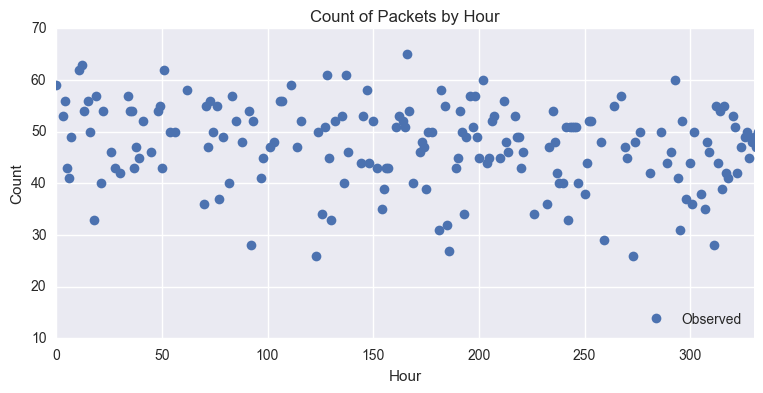

In [107]:
# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Count of Packets by Hour', xlabel='Hour', ylabel='Count')

# Plot data points
p53_ts.ix[0:, 'count'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
#predict.predicted_mean.ix[10:].plot(ax=ax, style='r--', label='One-step-ahead forecast')
#ci = predict_ci.ix[10:]
#ax.fill_between(ci.index, ci.ix[10:,0], ci.ix[:,1], color='r', alpha=0.1)
#predict_dy.predicted_mean.ix[0:].plot(ax=ax, style='g', label='Dynamic forecast (Day ??)')
#ci = predict_dy_ci.ix[0:]
#ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')